In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os, json
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections
from sklearn.metrics import confusion_matrix
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data=pd.read_csv('data/Bdata_for_ML.csv',header=0) #for 54 files
#data=pd.read_csv('data/Sdata_for_ML.csv',header=0)
data=data.drop(['Unnamed: 0',],axis=1)


In [2]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171612 entries, 0 to 171611
Data columns (total 248 columns):
is_starred                          bool
goal                                float64
usd_pledged                         float64
pledge_perc                         float64
staff_pick                          bool
launched_at_hr                      int64
launched_at_day_in_month            int64
launched_at_mo                      int64
launched_at_yr                      int64
deadline_hr                         int64
deadline_day_in_month               int64
deadline_mo                         int64
deadline_yr                         int64
created_at_hr                       int64
created_at_day_in_week              int64
created_at_day_in_month             int64
created_at_mo                       int64
created_at_yr                       int64
launched-created                    int64
goal_1000                           float64
goal_500                            float6

##  Small Tree ML

In [3]:
data=data.drop(['is_starred','usd_pledged','pledge_perc', 'staff_pick',],axis=1)
mod1=data

In [4]:
print(len(mod1))
corr_df=mod1.corr()
#corr_df[corr_df['state_num']==1]
#corr_df[(corr_df<1) & ((corr_df >= 0.3) | (corr_df <= -0.3)) ]

171612


In [5]:
cor_st=corr_df.loc['state_num']
print(cor_st.nsmallest(50))
print(cor_st.nlargest(50))


goal                               -0.226695
deadline_yr                        -0.189162
created_at_yr                      -0.188553
launched_at_yr                     -0.186114
category.slug_food                 -0.172964
category.slug_technology           -0.125430
category.name_Web                  -0.120252
category.name_Mobile Games         -0.097364
category.slug_crafts               -0.096475
category.name_Food Trucks          -0.086990
currency_EUR                       -0.086662
category.name_Apps                 -0.086578
category.name_Software             -0.082426
category.slug_journalism           -0.081538
deadline-launched                  -0.081511
category.name_Restaurants          -0.078340
deadline_hr                        -0.071423
category.name_Hip-Hop              -0.065599
category.name_DIY                  -0.064976
category.name_Drinks               -0.062454
category.name_Television           -0.058122
category.slug_photography          -0.057910
category.n

In [6]:
mod1_params= ['goal','launched-created','category.slug_food','category.slug_technology']


In [7]:
Dtree_Params=mod1_params
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision Tree visualization

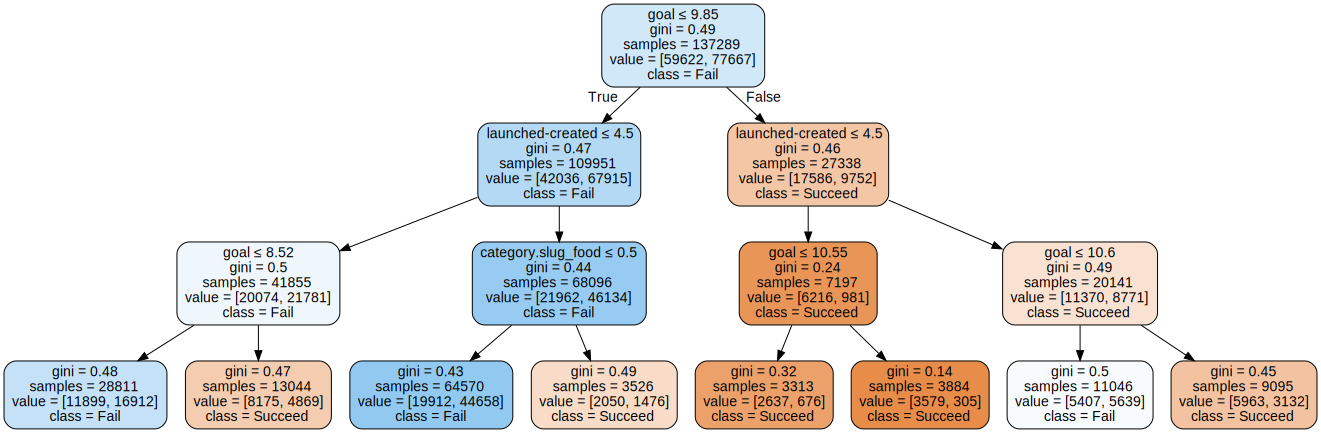

In [8]:


dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = Dtree_Params, 
                           class_names = ["Succeed", "Fail" ],
                           rounded = True, filled=True, special_characters=True,precision=2)
graph = graphviz.Source(dot_data) 
graph.format='png'
graph.render()
graph

In [9]:
# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 5613  9127]
 [ 2585 16998]]
Train set conf matrix is [[22404 37218]
 [10458 67209]]
The recall for the train set is  0.86534821739
The recall for the test set tree is  0.867997753153
The precision for the train set tree is  0.643597920078
The precision for the test tree is  0.650641148325
Y_test_proba[:,1] is [ 0.34436504  0.6916215   0.58699802 ...,  0.6916215   0.51050154
  0.37327507]
 Precision =  [ 0.57055036  0.58412432  0.59409163  0.61374893  0.64276455  0.65064115
  0.66609655  0.69506286  1.        ] 
 Recalls =  [ 1.          0.99617015  0.98789767  0.94919062  0.88617679  0.86799775
  0.79548588  0.57871623  0.        ] 
 Thresholds =  [ 0.07852729  0.20404467  0.34436504  0.37327507  0.41860465  0.51050154
  0.58699802  0.6916215 ]


##  Large Tree ML

In [10]:
para=mod1.drop(['state_num'],axis=1)
para.columns

Index(['goal', 'launched_at_hr', 'launched_at_day_in_month', 'launched_at_mo',
       'launched_at_yr', 'deadline_hr', 'deadline_day_in_month', 'deadline_mo',
       'deadline_yr', 'created_at_hr',
       ...
       'launched_at_day_in_week_5', 'launched_at_day_in_week_6',
       'launched_at_day_in_week_7', 'deadline_day_in_week_1',
       'deadline_day_in_week_2', 'deadline_day_in_week_3',
       'deadline_day_in_week_4', 'deadline_day_in_week_5',
       'deadline_day_in_week_6', 'deadline_day_in_week_7'],
      dtype='object', length=243)

In [11]:
Dtree_Params=para.columns
train_df, test_df= train_test_split (mod1, test_size = 0.2, random_state=6)
Y_train = train_df["state_num"]
X_train = train_df[Dtree_Params]
Y_test=test_df["state_num"]
X_test=test_df[Dtree_Params]
tree_clf = DecisionTreeClassifier (max_depth = 3)
tree_clf.fit (X_train, Y_train)

# Run the test set through the decision tree
Y2_test_Tree_predict = tree_clf.predict (X_test)  

#Test set conf matrix
conf_matrix_Testdata = confusion_matrix(Y_test, Y2_test_Tree_predict) 
print('Test set conf matrix is',conf_matrix_Testdata)

#Train set conf. matrix
conf_matrix_Traindata = confusion_matrix(Y_train, tree_clf.predict (X_train)) 
print('Train set conf matrix is',conf_matrix_Traindata)

from sklearn.metrics import precision_score, recall_score

print("The recall for the train set is ",recall_score(Y_train, tree_clf.predict (X_train)))
print("The recall for the test set tree is ",recall_score(Y_test, Y2_test_Tree_predict))
print("The precision for the train set tree is ",precision_score(Y_train, tree_clf.predict (X_train)))
print("The precision for the test tree is ",precision_score(Y_test, Y2_test_Tree_predict))

Y_test_proba = tree_clf.predict_proba(X_test)
print('Y_test_proba[:,1] is',Y_test_proba[:,1])

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

Test set conf matrix is [[ 8285  6455]
 [ 4611 14972]]
Train set conf matrix is [[33810 25812]
 [17980 59687]]
The recall for the train set is  0.768498847644
The recall for the test set tree is  0.764540673033
The precision for the train set tree is  0.698101732184
The precision for the test tree is  0.698744574602
Y_test_proba[:,1] is [ 0.3681548   0.60907862  0.39522556 ...,  0.60907862  0.3681548
  0.39522556]
 Precision =  [ 0.57055036  0.59336733  0.59536597  0.62592191  0.69696829  0.69874457
  0.70741473  0.82827448  1.        ] 
 Recalls =  [ 1.          0.99223817  0.99065516  0.91441556  0.76658326  0.76454067
  0.71276107  0.35811673  0.        ] 
 Thresholds =  [ 0.0927142   0.18970588  0.3681548   0.39522556  0.42891566  0.60569469
  0.60907862  0.83099329]


## Precision plot graph 

In [12]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])

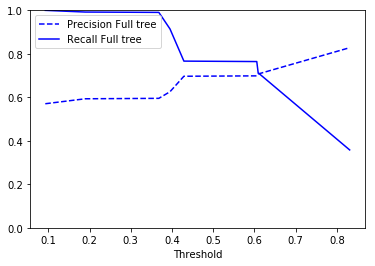

In [13]:
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="Full tree")
plt.legend(loc = "best")

## Roc Curve Plotting

In [14]:
from sklearn.metrics import roc_curve

In [15]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1])

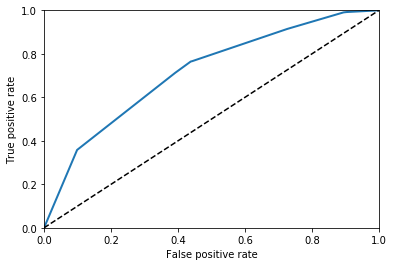

In [16]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "Full tree")
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the Full tree is: ", roc_auc_score(Y_test, Y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the Full tree is:  0.716036314415


## Random forest (RF)

In [18]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 2, n_jobs= -1)
rnd_clf.fit (X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [19]:
confusion_matrix(Y_test, y_pred_rf)

array([[ 4151, 10589],
       [ 1531, 18052]], dtype=int64)

In [20]:
recall_score(Y_test, y_pred_rf)

0.92181994587141913

In [21]:
precision_score(Y_test, y_pred_rf)

0.63028525540309344

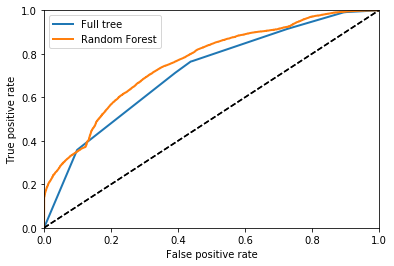

In [22]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc = "best")
plt.show()

In [23]:
roc_auc_score(Y_test, y_rf_proba[:,1])

0.76024913891545087

In [24]:
feature_score = rnd_clf.feature_importances_
feature_score

array([  6.55650529e-02,   8.88841197e-05,   1.59663479e-07,
         2.59359978e-06,   9.33165696e-02,   2.21761900e-03,
         6.62369179e-06,   1.60316432e-05,   1.01113482e-01,
         1.05776057e-05,   1.57556140e-05,   1.00067976e-05,
         6.09250818e-06,   9.00447044e-02,   3.89183093e-02,
         5.30464836e-02,   4.91064085e-02,   6.65716244e-02,
         0.00000000e+00,   2.88360904e-05,   8.40705928e-03,
         1.44119140e-03,   6.18591875e-03,   8.40932355e-03,
         2.17051168e-02,   0.00000000e+00,   3.17955472e-04,
         0.00000000e+00,   2.94435364e-02,   2.91828625e-02,
         2.23782597e-06,   9.02774977e-05,   2.79295409e-04,
         1.84939482e-05,   0.00000000e+00,   1.41963371e-04,
         9.84150992e-05,   4.31693036e-04,   0.00000000e+00,
         1.12696310e-03,   0.00000000e+00,   4.32852612e-04,
         3.10460322e-03,   1.44804354e-04,   2.06056763e-05,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [25]:
feature_names = list(X_train)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
#df_feature_score.head()
df_feature_score_short=df_feature_score.drop(df_feature_score.index[12:])
df_feature_score_short

,feature,score
8,deadline_yr,0.101113
4,launched_at_yr,0.093317
13,created_at_yr,0.090045
17,goal_10,0.066572
0,goal,0.065565
15,goal_1000,0.053046
16,goal_500,0.049106
185,category.slug_food,0.045683
14,launched-created,0.038918
28,name_non_character,0.029444


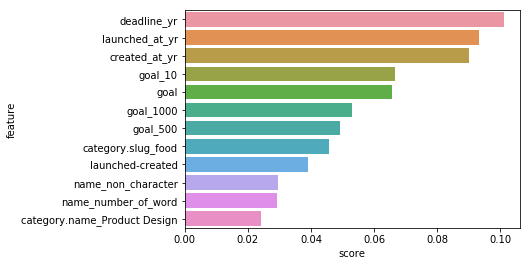

In [26]:
sns.barplot(y="feature", x="score", data=df_feature_score_short)

## GBM

In [27]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [28]:
y_pred_gb = clf_gb.predict(X_test)

In [29]:
confusion_matrix(Y_test, y_pred_gb)

array([[10043,  4697],
       [ 3529, 16054]], dtype=int64)

In [30]:
recall_score(Y_test, y_pred_gb)

0.81979267732216721

In [31]:
precision_score(Y_test, y_pred_gb)

0.77364946267649748

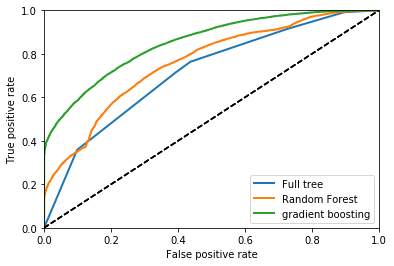

In [32]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(Y_test, y_gb_proba[:,1])

y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "Full tree")
plot_roc_curve (fpr_rf, tpr_rf, "Random Forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

## Precision graph plots for all methods

(0, 1)

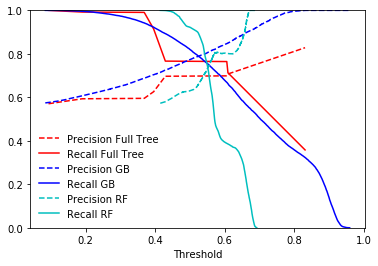

In [33]:
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_true = Y_test, probas_pred = y_gb_proba[:,1])
precisions_RF, recalls_RF, thresholds_RF = precision_recall_curve(y_true = Y_test, probas_pred = y_rf_proba[:,1])
precisions, recalls, thresholds = precision_recall_curve(y_true = Y_test, probas_pred = Y_test_proba[:,1])

plt.plot (thresholds, precisions[:-1], "r"+"--", label="Precision Full Tree")
plt.plot (thresholds, recalls[:-1], "r"+"-", label="Recall Full Tree ")
plt.plot (thresholds_GB, precisions_GB[:-1], "b"+"--", label="Precision GB")
plt.plot (thresholds_GB, recalls_GB[:-1], "b"+"-", label="Recall GB")
plt.plot (thresholds_RF, precisions_RF[:-1], "c"+"--", label="Precision RF")
plt.plot (thresholds_RF, recalls_RF[:-1], "c"+"-", label="Recall RF")

plt.xlabel("Threshold")
plt.legend(frameon=False)
plt.ylim([0,1])


## Linear Regression

In [37]:
# Linear Regression imports
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
from sklearn.metrics import mean_squared_error

In [38]:
data=pd.read_csv('data/Bdata_for_ML.csv',header=0) #for 54 files
data=data.drop(['Unnamed: 0',],axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171612 entries, 0 to 171611
Columns: 248 entries, is_starred to deadline_day_in_week_7
dtypes: bool(2), float64(9), int64(237)
memory usage: 322.4 MB


In [40]:
#define range of data
data_r=data[data['pledge_perc']<300]
data_r=data_r[data_r['pledge_perc']>=100]

In [150]:
mask = data_r.columns.str.contains('category.name')
mask[1]=True #add goal to parameters
mask[4]=True #add staff pick to parameters
mask[18]=True #add launched-created
mask[27]=True #add deadline-launched
lin_reg_params=data_r.columns[mask]
lin_reg_params

Index(['goal', 'staff_pick', 'launched-created', 'deadline-launched',
       'category.name_3D Printing', 'category.name_Academic',
       'category.name_Accessories', 'category.name_Action',
       'category.name_Animals', 'category.name_Animation',
       ...
       'category.name_Wearables', 'category.name_Weaving', 'category.name_Web',
       'category.name_Webcomics', 'category.name_Webseries',
       'category.name_Woodworking', 'category.name_Workshops',
       'category.name_World Music', 'category.name_Young Adult',
       'category.name_Zines'],
      dtype='object', length=148)

In [151]:
#define parameters for regression
y = data_r [['pledge_perc']]
#X = data_r[['goal','deadline-launched','launched-created','category.id']]
X = data_r[lin_reg_params]

In [152]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.4, random_state=8)

In [153]:
#perform regression
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [154]:
print("predicted y = ", lin_reg.coef_, " * X + ", lin_reg.intercept_)

predicted y =  [[ -6.84590164e+00   1.31942950e+01   2.55619943e-03  -2.34504045e+00
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2.33330476e+10  -2.33330476e+10  -2.33330476e+10  -2.33330476e+10
   -2

In [155]:
y_test_pred_numeric = lin_reg.predict(X_test)

In [156]:
lin_reg.score(X_test, y_test)
#R square score

0.12873523641830864

In [157]:
mean_squared_error(y_test, y_test_pred_numeric)

1551.3714649637996

[Text(0,0.5,'Residual = Y-predicted - Y-test'),
 Text(0.5,0,'Y-test'),
 Text(0.5,1,'Linear Regression')]

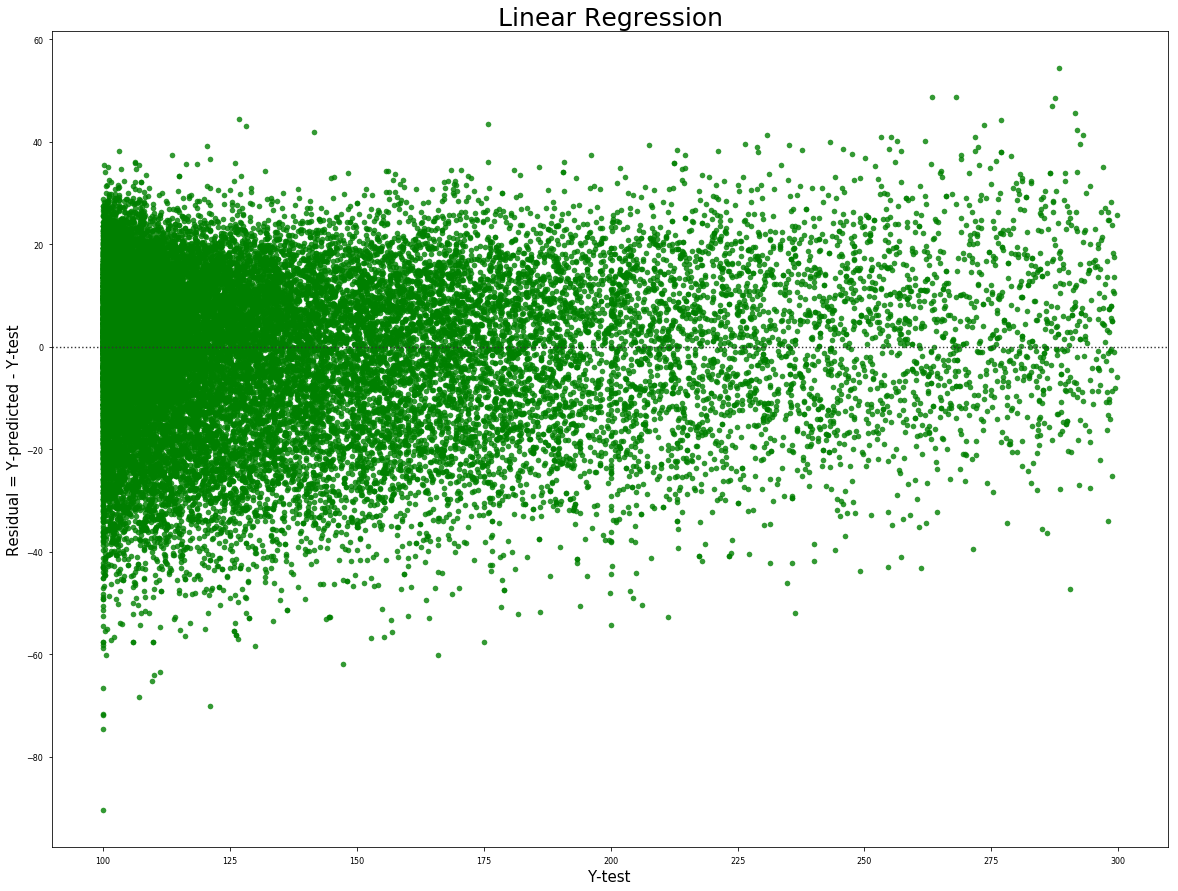

In [189]:
plt.subplots(figsize=(20,15))
ax= sns.residplot(y_test, y_test-y_test_pred_numeric, color="g")
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":25,"axes.labelsize":15})
ax.set(xlabel='Y-test', ylabel='Residual = Y-predicted - Y-test',title="Linear Regression")